#### 1) Delivery_time -> Predict delivery time using sorting time 

------------------------------------------------------------
#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.dtypes
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.shape

(21, 2)

In [6]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [7]:
data[data.duplicated()].shape

(0, 2)

In [8]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
data.isna()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


<AxesSubplot:>

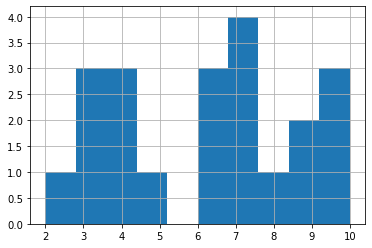

In [10]:
data["Sorting Time"].hist()

<AxesSubplot:>

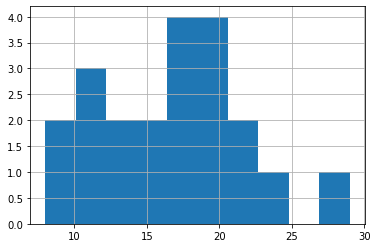

In [11]:
data["Delivery Time"].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x20201b675b0>,
 'caps': [<matplotlib.lines.Line2D at 0x20201b67c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x20201b672e0>],
 'medians': [<matplotlib.lines.Line2D at 0x20201b79130>],
 'fliers': [<matplotlib.lines.Line2D at 0x20201b79400>],
 'means': []}

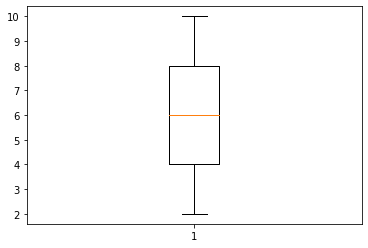

In [12]:
data_box = data
data_box = data_box["Sorting Time"]
plt.boxplot(data_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x20201bd58e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20201bd5e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x20201bd5610>,
 'medians': [<matplotlib.lines.Line2D at 0x20201be3460>,
 'fliers': [<matplotlib.lines.Line2D at 0x20201be3730>,
 'means': []}

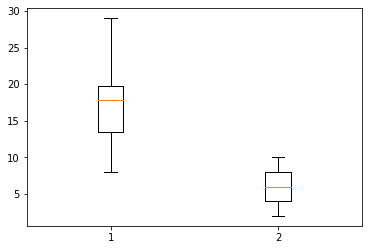

In [13]:
plt.boxplot(data)

<AxesSubplot:ylabel='Density'>

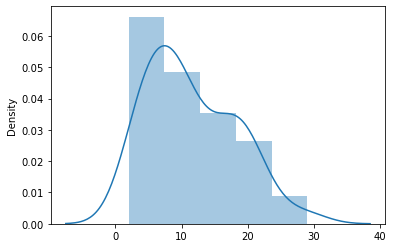

In [14]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(data)

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

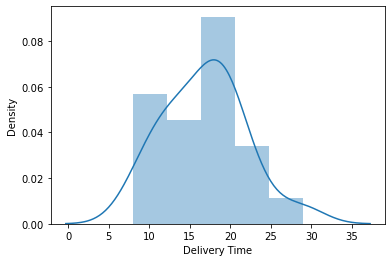

In [15]:
sns.distplot(data["Delivery Time"])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

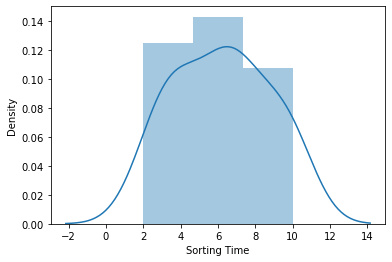

In [16]:
sns.distplot(data["Sorting Time"])

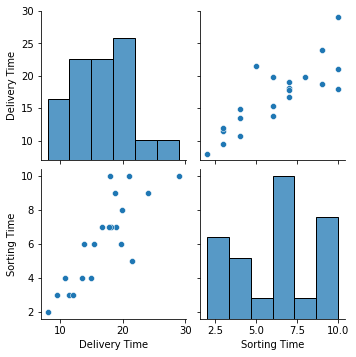

In [17]:
sns.pairplot(data)

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

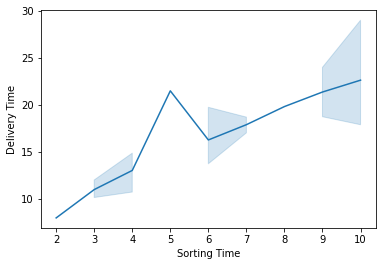

In [18]:
sns.lineplot(data["Sorting Time"],data["Delivery Time"])

In [19]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [20]:
!pip install pandas_profiling
!pip install sweetviz

In [21]:
import pandas_profiling as pp 
import sweetviz as sv 

In [22]:
EDA_report = pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
sweet_report = sv.analyze(data)
sweet_report.show_html("data.html")

                                             |                                             | [  0%]   00:00 ->…

Report data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [24]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [25]:
new_data = pd.DataFrame(data)
new_data.set_axis(['del_time','sort_time'], axis='columns', inplace=True)
print(new_data.columns)  

Index(['del_time', 'sort_time'], dtype='object')


In [26]:
new_data["del_time"]
new_data["sort_time"]

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: sort_time, dtype: int64

### Model Building

In [27]:
import statsmodels.formula.api as smf
model = smf.ols("del_time~sort_time",data = new_data).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               del_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        00:01:46   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sort_time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model.params

Intercept    6.582734
sort_time    1.649020
dtype: float64

In [30]:
print(model.tvalues,"\n",model.pvalues)

Intercept    3.823349
sort_time    6.387447
dtype: float64 
 Intercept    0.001147
sort_time    0.000004
dtype: float64


In [31]:
model.rsquared

0.6822714748417231

<AxesSubplot:xlabel='del_time', ylabel='sort_time'>

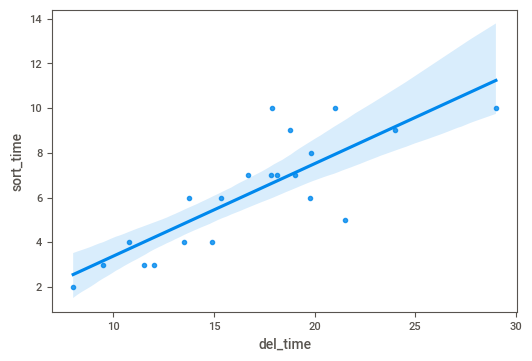

In [32]:
sns.regplot(x="del_time",y="sort_time",data=new_data)

In [33]:
model.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [34]:
new_data

,del_time,sort_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [35]:
pred = model.predict(new_data.sort_time)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [36]:
print(model.conf_int(0.05))

                  0          1
Intercept  2.979134  10.186334
sort_time  1.108673   2.189367


In [37]:
rmse_lin = np.sqrt(np.mean((np.array(new_data.del_time)-np.array(pred))**2))

In [38]:
rmse_lin

2.7916503270617654

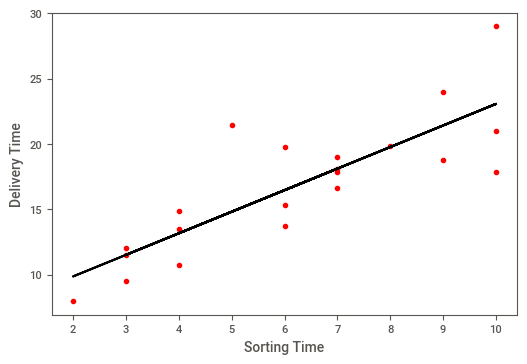

In [39]:
plt.scatter(x=new_data.sort_time,y=new_data.del_time,color="red")
plt.plot(new_data.sort_time,pred,color = "black")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

### Model 2

In [40]:
model2 = smf.ols("del_time ~ np.log(sort_time)",data = new_data).fit()

In [41]:
model2.params

Intercept            1.159684
np.log(sort_time)    9.043413
dtype: float64

In [42]:
model2.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [43]:
model2.resid_pearson

array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [44]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               del_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        00:01:47   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sort_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
print(model2.tvalues,"\n",model2.pvalues)

Intercept            0.472460
np.log(sort_time)    6.586789
dtype: float64 
 Intercept            0.641980
np.log(sort_time)    0.000003
dtype: float64


In [46]:
model2.rsquared

0.6954434611324223

In [47]:
pred2 = model2.predict(new_data.sort_time)

In [48]:
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [49]:
print(model2.conf_int(0.05))

                         0          1
Intercept         -3.97778   6.297147
np.log(sort_time)  6.16977  11.917057


In [50]:
rmse_lin2 = np.sqrt(np.mean((np.array(new_data.del_time) - np.array(pred2))**2))
rmse_lin2

2.733171476682066

In [51]:
pred2.corr(new_data.del_time)

0.8339325279256244

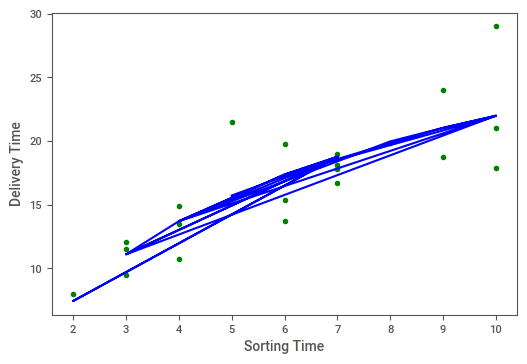

In [52]:
plt.scatter(x=new_data.sort_time,y=new_data.del_time,color="green")
plt.plot(new_data.sort_time,pred2,color="blue")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

### Model3

In [53]:
model3 = smf.ols("np.log(del_time) ~ sort_time",data = new_data).fit()

In [54]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(del_time)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                        00:01:48   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
sort_time      0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model3.params

Intercept    2.121372
sort_time    0.105552
dtype: float64

In [56]:
model3.resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [57]:
pred_log = model3.predict(pd.DataFrame(new_data.sort_time))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [58]:
pred3 = np.exp(pred_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [59]:
rmse_exp = np.sqrt(np.mean((np.array(new_data["del_time"])-np.array(pred3))**2))
rmse_exp

2.940250323056201

In [60]:
pred3.corr(new_data.del_time)

0.808578010828926

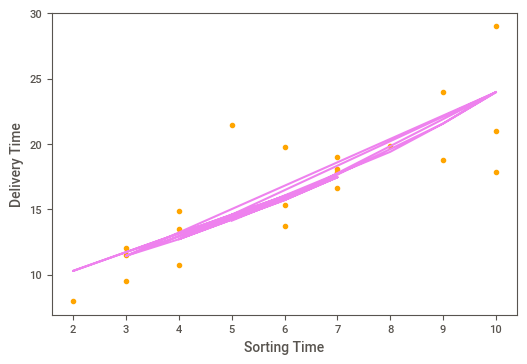

In [61]:
plt.scatter(x=new_data.sort_time,y=new_data.del_time,color="orange")
plt.plot(new_data.sort_time,pred3,color="violet")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [62]:
product_resid = model3.resid_pearson 
product_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

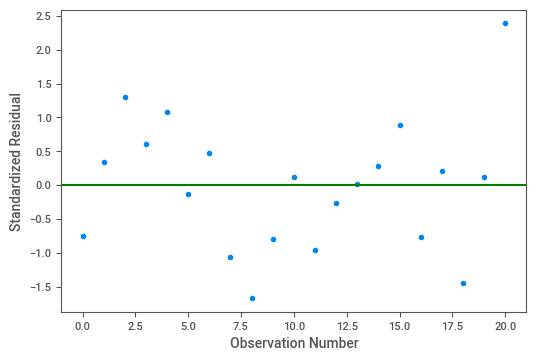

In [63]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

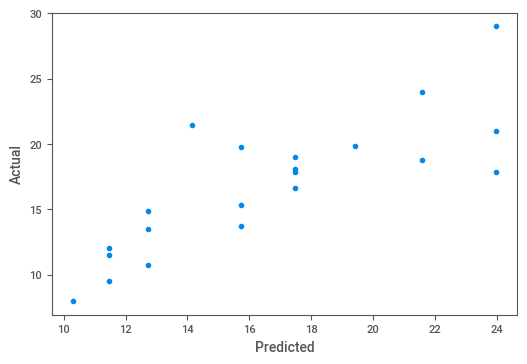

In [64]:
plt.scatter(x=pred3,y=new_data.del_time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Model4

In [65]:
new_data["sort_time_sq"] = new_data.sort_time*new_data.sort_time

In [66]:
new_data

,del_time,sort_time,sort_time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [67]:
model4 = smf.ols("np.log(del_time)~sort_time+sort_time_sq",data=new_data).fit()
model4.params

Intercept       1.699704
sort_time       0.265922
sort_time_sq   -0.012841
dtype: float64

In [68]:
model4.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [69]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(del_time)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           2.20e-06
Time:                        00:01:49   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6997      0.228      7.441      0.000       1.220       2.180
sort_time        0.2659      0.080      3.315      0.004       0.097       0.434
sort_time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
pred_quad = model4.predict(new_data)
pred4=np.exp(pred_quad)  # as we have used log(del_time) in preparing model so we need to convert it back
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [71]:
rmse_quad = np.sqrt(np.mean((np.array(new_data['del_time'])-np.array(pred4))**2))
rmse_quad 

2.799041988740925

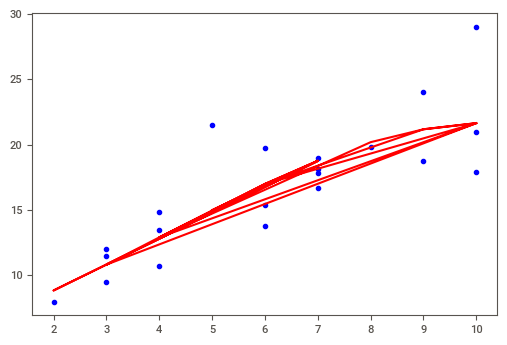

In [72]:
plt.scatter(new_data.sort_time,new_data.del_time,c="b")
plt.plot(new_data.sort_time,pred4,"r")

Text(0, 0.5, 'Standardized Residual')

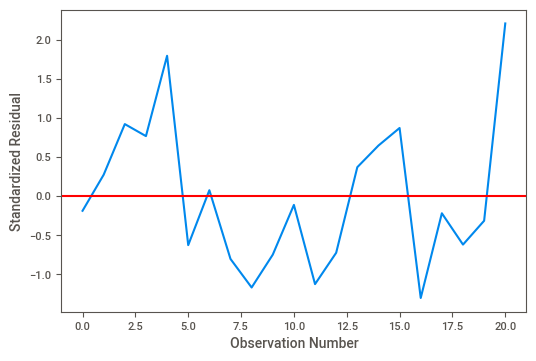

In [73]:
plt.plot(np.arange(21),model4.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")   

Text(0, 0.5, 'Standardized Residual')

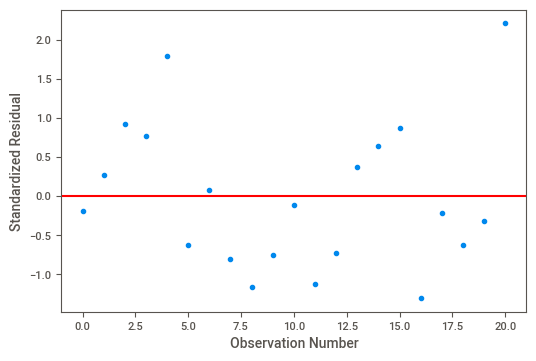

In [74]:
plt.scatter(np.arange(21),model4.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")  